In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


## Load the Image

In [4]:
from PIL import Image, ImageDraw, ImageFilter
img = Image.open("abc.png")

## Create a Mask

In [8]:
x = 100  # Replace with the actual x-coordinate of the circle's center
y = 120  # Replace with the actual y-coordinate of the circle's center
radius = 50  # Replace with the actual radius of the circle

# Create a mask to identify the colored circle
mask = Image.new("L", img.size, 0)
draw = ImageDraw.Draw(mask)
circle_coords = (x - radius, y - radius, x + radius, y + radius)
draw.ellipse(circle_coords, fill=255)

## Modify the color

In [10]:
new_color = (0, 0, 255)  # New color in RGB format (blue in this case)
color_image = Image.new("RGB", img.size, new_color)
modified_img = Image.composite(color_image, img, mask)
# modified_img = img.copy()
# modified_img.paste(new_color, mask)

In [11]:
modified_img.show()

In [16]:
from PIL import Image, ImageDraw

# Load the image
img = Image.open('abc.png')

# Create a mask to identify the outline of the circle
mask = Image.new("L", img.size, 0)
draw = ImageDraw.Draw(mask)
x, y = 100, 100  # Example coordinates of the circle's center
radius = 50  # Example radius of the circle

# Draw the outline of the circle on the mask
draw.ellipse((x - radius, y - radius, x + radius, y + radius), outline=255)

# Create an image with only the outline color (RGB format)
outline_color = (0, 0, 255)  # Example outline color (blue)
outline = Image.new('RGB', img.size, (0, 0, 0))  # Initialize with black
for i in range(img.size[0]):
    for j in range(img.size[1]):
        if mask.getpixel((i, j)) > 0:
            outline.putpixel((i, j), outline_color)

# Apply the outline color to the original image, keeping the interior unchanged
result = Image.alpha_composite(img.convert('RGBA'), outline.convert('RGBA'))

# Display or save the modified image
result.show()  # Display the modified image
# result.save("modified_image.jpg")  # Save the modified image


In [17]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 435.7 kB/s eta 0:01:28
   ---------------------------------------- 0.1/38.1 MB 655.4 kB/s eta 0:00:58
   ---------------------------------------- 0.2/38.1 MB 1.4 MB/s eta 0:00:27
   ---------------------------------------- 0.4/38.1 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.5/38.1 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.6/38.1 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.7/38.1 MB 2.2 MB/s eta 0:00:17
    --------------------------------------- 0.9/38.1 MB 2.5 MB/s eta 0:00:16
   - --------------

In [18]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


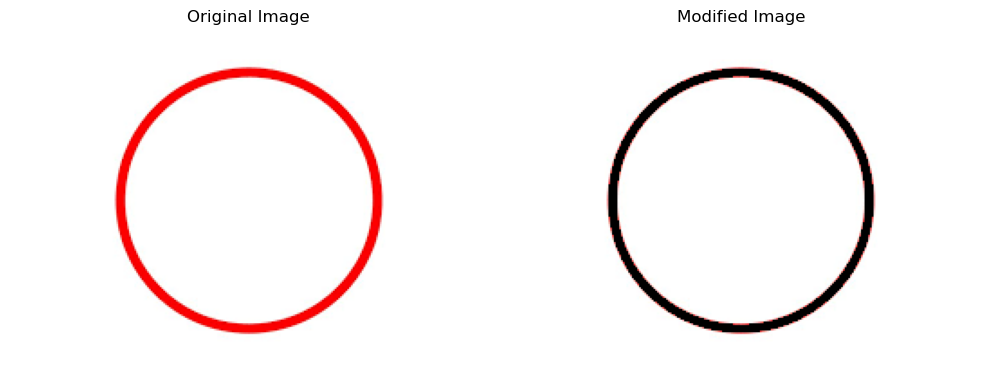

In [5]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# Step 1: Load the image using OpenCV
image_path = "abc.png"  # Replace with the path to your image file
image = cv2.imread(image_path)
# Step 2: Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Step 3: Create a mask to identify the red region
lower_red = np.array([100, 0, 0])  # Adjust the lower bound for red color in RGB
upper_red = np.array([255, 50, 50])  # Adjust the upper bound for red color in RGB
red_mask = cv2.inRange(image_rgb, lower_red, upper_red)
# Step 4: Change the color of the red region to black
black_color = (0, 0, 0)
image_rgb[np.where(red_mask)] = black_color
# Step 5: Convert the modified image back to BGR for saving with OpenCV
image_bgr_modified = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
# Step 6: Save the modified image
cv2.imwrite("circleAndHandSign.jpg", image_bgr_modified)
# Step 7: Display the original and modified images using Pillow
original_pillow_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
modified_pillow_image = Image.fromarray(image_rgb)
original_pillow_image.show(title="Original Image")
modified_pillow_image.show(title="Modified Image")

image_rgb_modified = cv2.cvtColor(image_bgr_modified, cv2.COLOR_BGR2RGB)

# Display the images using matplotlib.pyplot
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the modified image
plt.subplot(1, 2, 2)
plt.imshow(image_rgb_modified)
plt.title('Modified Image')
plt.axis('off')

plt.tight_layout()
plt.show()